# Predicting MLB Slugging Percentage

### April 26, 2025

## Introduction

Professional sports teams in the MLB are constantly looking for ways to predict player performance in order to make insightful decisions about who to sign to their team, who's contracts to extend, who to trade, and who to part ways with. Traditionally, baseball is a sport that is immersed in advanced statistics that can give way to comprehensive analytics. More simple metrics such as batting average, home runs, or walks are a bit easier to predict, but also don't give a complete picture of a batter's effectiveness. More advances stats like on base percentage (OBP), slugging percentage (SLG), and on-base plus slugging (OBPS) are more commonly used to show a players output, but are also much harder to predict.

Slugging percentage is a numerical measurement that is used to represent a player's power with more detail than simply looking at their homeruns. SLG is calculated by giving different weights to different base hits. The equation is:

```
slg = (1*1B + 2*2B + 3*3B + 4*HR) / AB
``` 

where 1B, 2B, 3B, and HR stand for a single, double, triple, and homerun, respectively, and AB is the number of at bats. This statistic weighs different types of hits in a manner that at a glance you can see a batter's power, even if it doesn't always translate directly to home runs.

The following analysis will explore, analyze, and identify with statistics are the most effective at determining a player's slugging percentage. With this information, a team could identify which metrics are easy to predict for different players, and plug those variables in and get an accurate prediction of that players slugging percentage, or how much power they will hit with.

## Exploratory Data Analysis (EDA)

### Introduction to Data

This data was downloaded from MLB's official statistics branch, Baseball Savant (https://baseballsavant.mlb.com/). This tool allows users to select certain seasons, qualifications, and which statistics you want to see. Some of the statistics included in this dataset are

* general hitting statistics like plate appearances and batting average
* bat tracking stastics like average bat speed
* exit velocity and launch angle

The data is from 2015 - 2024, and players with at least 50 plate appearances are included. Many players will have multiple entries since they play multiple seasons, but this should not matter when trying to predict slugging percentage.

For reference, here is a table containing every statistic in the data, and what that statistic measures.

| Variable Name      | Definition                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| pa                 | A plate appearance refers to a batter's turn at the plate. Each completed turn batting is one plate appearance. Plate appearances can often be confused with at-bats. But unlike with at-bats -- which only occur on certain results -- a plate appearance takes into account every single time a batter comes up and a result between batter and pitcher is obtained.                                                                                                                                                                                      |
| home_run           | A home run occurs when a batter hits a fair ball and scores on the play without being put out or without the benefit of an error.                                                                                                                                                                                                                                                                                                                                                                                                                           |
| walk               | A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base. In the scorebook, a walk is denoted by the letters BB.                                                                                                                                                                                                                                                              |
| k_percent          | Strikeout rate represents the frequency with which a pitcher strikes out hitters, as determined by total strikeouts divided by total batters faced.                                                                                                                                                                                                                                                                                                                                                                                                         |
| bb_percent         | Walk rate represents the frequency with which a pitcher walks hitters, as determined by total walks divided by total batters faced. It's an important tool for assessing a pitcher's capabilities and perhaps the most important in judging a pitcher's tendency to walk batters.                                                                                                                                                                                                                                                                           |
| batting_avg        | One of the oldest and most universal tools to measure a hitter's success at the plate, batting average is determined by dividing a player's hits by his total at-bats for a number between zero (shown as .000) and one (1.000). In recent years, the league-wide batting average has typically hovered around .250.                                                                                                                                                                                                                                        |
| slg_percent        | Slugging percentage represents the total number of bases a player records per at-bat. Unlike on-base percentage, slugging percentage deals only with hits and does not include walks and hit-by-pitches in its equation.                                                                                                                                                                                                                                                                                                                                    |
| on_base_percent    | OBP refers to how frequently a batter reaches base per plate appearance. Times on base include hits, walks and hit-by-pitches, but do not include errors, times reached on a fielder's choice or a dropped third strike. (Separately, sacrifice bunts are removed from the equation entirely, because it is rarely a hitter's decision to sacrifice himself, but rather a manager's choice as part of an in-game strategy.)                                                                                                                                 |
| b_rbi              | A batter is credited with an RBI in most cases where the result of his plate appearance is a run being scored. There are a few exceptions, however. A player does not receive an RBI when the run scores as a result of an error or ground into double play.                                                                                                                                                                                                                                                                                                |
| xba                | Expected Batting Average (xBA) is a Statcast metric that measures the likelihood that a batted ball will become a hit.                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| woba               | wOBA is a version of on-base percentage that accounts for how a player reached base -- instead of simply considering whether a player reached base. The value for each method of reaching base is determined by how much that event is worth in relation to projected runs scored (example: a double is worth more than a single).                                                                                                                                                                                                                          |
| xwoba              | Expected Weighted On-base Average (xwOBA) is formulated using exit velocity, launch angle and, on certain types of batted balls, Sprint Speed.                                                                                                                                                                                                                                                                                                                                                                                                              |
| xobp               | xOBP estimates the likelihood of a hit or out based on the quality of contact and the player’s speed                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| avg_swing_speed    | The average speed at which a batter swings the bat                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| fast_swing_rate    | Statcast defines a “fast swing” as one that reaches a swing speed of 75 MPH. A player’s “fast-swing rate” is simply showing the percentage of all of his swings that did reach 75 MPH. In the first month of 2024, 23% of all swings qualified as a ‘fast swing.’                                                                                                                                                                                                                                                                                           |
| blasts_contact     | A blast, in Statcast terms, is when a batter squares up a ball and does so with a high bat speed.                                                                                                                                                                |
| blasts_swing       | A blast, in Statcast terms, is when a batter squares up a ball and does so with a high bat speed.                                                                                                                                                            |
| squared_up_contact | A swing’s squared-up rate tells us how much of the highest possible exit velocity available (based on the physics related to the swing speed and pitch speed) a batter was able to obtain – it is, at its simplest, how much exit velocity did you get as a share of how much exit velocity was possible based on your swing speed and the speed of the pitch. A swing that is 60% squared up, for example, tells you that the batter attained 60% of the maximum possible exit velocity available to him, again based on the speed of the swing and pitch. |
| squared_up_swing   | A swing’s squared-up rate tells us how much of the highest possible exit velocity available (based on the physics related to the swing speed and pitch speed) a batter was able to obtain – it is, at its simplest, how much exit velocity did you get as a share of how much exit velocity was possible based on your swing speed and the speed of the pitch. A swing that is 60% squared up, for example, tells you that the batter attained 60% of the maximum possible exit velocity available to him, again based on the speed of the swing and pitch. |
| exit_velocity_avg  | Exit Velocity measures the speed of the baseball as it comes off the bat, immediately after a batter makes contact. This is tracked for all Batted Ball Events -- outs, hits and errors.                                                                                                                                                                                                                                                                                                                                                                    |
| launch_angle_avg   | Launch Angle measures the vertical angle, in degrees, at which the ball leaves a player's bat after being hit.                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| sweet_spot_percent | Colloquially, a player who hits the ball solidly is said to have gotten the "sweet spot" of the bat on the ball. The sweet spot classification quantifies that as a batted-ball event with a launch angle ranging from 8 to 32 degrees.                                                                                                                                                                                                                                                                                                                     |
| barrel_batted_rate | The Barrel classification is assigned to batted-ball events whose comparable hit types (in terms of exit velocity and launch angle) have led to a minimum .500 batting average and 1.500 slugging percentage since Statcast was implemented Major League wide in 2015.                                                                                                                                                                                                                                                                                      |
| hard_hit_percent   | Statcast defines a 'hard-hit ball' as one hit with an exit velocity of 95 mph or higher, and a player's "hard-hit rate" is simply showing the percentage of batted balls that were hit at 95 mph or more.                                                                                                                                                                                                                                                                                                                                                   |
| whiff_percent      | The ratio of swings and misses to the total number of swings                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| swing_percent      | The percenrage os pitches at which a batter swings                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |

Import packages

In [1459]:
# Standard operational packages
import numpy as np
import pandas as pd

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# For data modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#For metrics and helpful functions
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For displaying all columns in dataframe
pd.set_option('display.max_columns', None)

Load datasets

In [1460]:
df = pd.read_csv('Data/stats.csv')

In [1461]:
print(df.shape)

(5336, 29)


There are 5,336 rows in our data, each containing a season from a player.

In [1462]:
df.columns

Index(['last_name, first_name', 'player_id', 'year', 'pa', 'home_run', 'walk',
       'k_percent', 'bb_percent', 'batting_avg', 'slg_percent',
       'on_base_percent', 'b_rbi', 'xba', 'woba', 'xwoba', 'xobp',
       'avg_swing_speed', 'fast_swing_rate', 'blasts_contact', 'blasts_swing',
       'squared_up_contact', 'squared_up_swing', 'exit_velocity_avg',
       'launch_angle_avg', 'sweet_spot_percent', 'barrel_batted_rate',
       'hard_hit_percent', 'whiff_percent', 'swing_percent'],
      dtype='object')

In [1463]:
print(df.dtypes)

last_name, first_name     object
player_id                  int64
year                       int64
pa                         int64
home_run                   int64
walk                       int64
k_percent                float64
bb_percent               float64
batting_avg              float64
slg_percent              float64
on_base_percent          float64
b_rbi                      int64
xba                      float64
woba                     float64
xwoba                    float64
xobp                     float64
avg_swing_speed          float64
fast_swing_rate          float64
blasts_contact           float64
blasts_swing             float64
squared_up_contact       float64
squared_up_swing         float64
exit_velocity_avg        float64
launch_angle_avg         float64
sweet_spot_percent       float64
barrel_batted_rate       float64
hard_hit_percent         float64
whiff_percent            float64
swing_percent            float64
dtype: object


### Data Cleaning & Preprocessing

Let's first check for null or missing data.

In [1464]:
df.isna().sum()

last_name, first_name       0
player_id                   0
year                        0
pa                          0
home_run                    0
walk                        0
k_percent                   0
bb_percent                  0
batting_avg                 0
slg_percent                 0
on_base_percent             0
b_rbi                       0
xba                         0
woba                        0
xwoba                       0
xobp                        0
avg_swing_speed          4306
fast_swing_rate          4306
blasts_contact           4306
blasts_swing             4306
squared_up_contact       4306
squared_up_swing         4306
exit_velocity_avg           0
launch_angle_avg            0
sweet_spot_percent          0
barrel_batted_rate          0
hard_hit_percent            0
whiff_percent               0
swing_percent               0
dtype: int64

There are a number of missing values for a few of the statistics. This is due to which stats are tracked given the year. The entire dataset only back to 2015, however, certain advanced metrics related to bat tracking were not collected this entire time. The bat tracking metrics are only available starting from the second half of the 2023 season. Due to this, I will create multiple dataframes to separate the data containing these metrics from the rest, and compare how well the models work at the end to see how important these are for slugging percentage.

In [1465]:
# Store data with bat tracking metrics
df_tracking = df[~df.isna().any(axis=1)]
df.drop(columns=['avg_swing_speed', 'fast_swing_rate', 'blasts_contact', 'blasts_swing', 'squared_up_contact', 'squared_up_swing'], inplace=True)
df_tracking.isna().sum()

last_name, first_name    0
player_id                0
year                     0
pa                       0
home_run                 0
walk                     0
k_percent                0
bb_percent               0
batting_avg              0
slg_percent              0
on_base_percent          0
b_rbi                    0
xba                      0
woba                     0
xwoba                    0
xobp                     0
avg_swing_speed          0
fast_swing_rate          0
blasts_contact           0
blasts_swing             0
squared_up_contact       0
squared_up_swing         0
exit_velocity_avg        0
launch_angle_avg         0
sweet_spot_percent       0
barrel_batted_rate       0
hard_hit_percent         0
whiff_percent            0
swing_percent            0
dtype: int64

The next concern to address is the number of plate appearances (pa), or the amount of at bats a player had that season.

In [1466]:
df[['pa', 'batting_avg', 'home_run', 'slg_percent']].describe()

,pa,batting_avg,home_run,slg_percent
count,5336.000000,5336.000000,5336.000000,5336.000000
mean,314.392616,0.236105,9.978823,0.385226
std,200.266348,0.047529,9.737093,0.098708
min,50.000000,0.000000,0.000000,0.000000
25%,132.000000,0.211000,2.000000,0.329000
50%,274.000000,0.242000,7.000000,0.391000
75%,484.250000,0.267000,15.000000,0.448000
max,753.000000,0.400000,62.000000,0.755000


The MLB lists minimum qualifications that must be met for players to qualify for certain leaderboards. This prevents a player for example who only had 1 at bat the entire season and got a hit from leading the entire MLB with a 1.0 batting average. For hitters, this minimum amount is 3.1 PA's a game. There are a number of specifics to this calculation, such as when teams play one more or one fewer games, when players are active or not, as well as a specific rookie standard.

This is something we want ot think about before creating our models. Ensuring players have "enough" at bats in a season can help ensure the findings are statistacally relevant, and resistant to being swayed by outliers. Let's visualize the distribution of plate appearances to see if it might have a significant impact on our models.

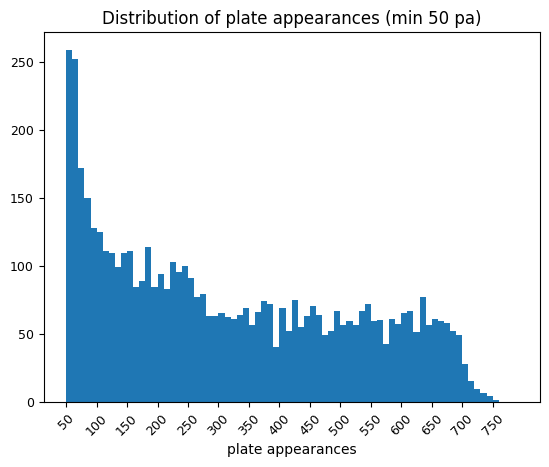

In [1467]:
plt.hist(df['pa'], bins=range(50, 800, 10))
plt.xticks(range(50, 800, 50), rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.title('Distribution of plate appearances (min 50 pa)')
plt.xlabel('plate appearances')
plt.show()

We can see the distribution is skewed right by a significant margin. Let's separate the data and see how the distribution looks. A boxplot can also be helpful to look for outliers and get an overview of general distribution.

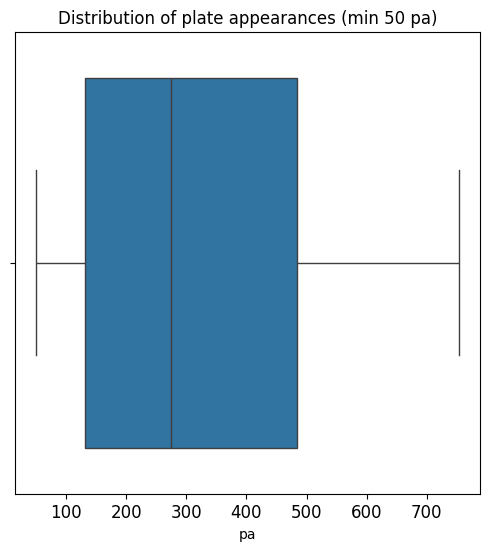

In [1468]:
plt.figure(figsize=(6,6))
plt.title('Distribution of plate appearances (min 50 pa)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['pa'])
plt.show()

There are no outliers apparant from the boxplot, but we do see again that the data is skewed right by a large margin. We can make some quick calculations to find out exavtly how much of the data are outliers.

In [1469]:
# Calculate percentiles and IQR
p_25 = df['pa'].quantile(0.25)
p_75 = df['pa'].quantile(0.75)
iqr = p_75 - p_25

# Calculate upper and lower limits and find outliers
upper_limit = p_75 + iqr
lower_limit = p_25 - iqr
outliers = df[(df['pa'] > upper_limit) | (df['pa'] < lower_limit)]

# Print  findings
print(f'Upper limit: {upper_limit:.2f}')
print(f'Lower limit: {lower_limit:.2f}')
print(f"Number of outliers in 'pa': {len(outliers)}")

Upper limit: 836.50
Lower limit: -220.25
Number of outliers in 'pa': 0


Mathematically speaking, there are no outliers in our data for plate appearances. The lower limit being a negative number stands out a bit, but it makes sense when you consider how much of the data is at or near the minimum value of 50, and how large the range of the data is. Before we begin any machine learning, I want to create a separate dataframe with only the rows that have a pa value that would qualify for the MLB leaderboards.

To keep things simple, I will apply a blanket qualification by multiplying 3.1 by the number of games each team is expected to play, 162. This will be a cutoff value that I will also use to separate the data to see if this minimum amount has significant impact in our model's performance.

In [1470]:
# Setting cutoff value
# Adding one and casting int to "round up" without importing math
pa_cutoff = int(3.1 * 162 + 1)
print(f'Our PA cutoff value: {pa_cutoff}')

Our PA cutoff value: 503


In [1471]:
df_min = df[df['pa'] >= pa_cutoff]
df_min[['pa', 'batting_avg', 'home_run', 'slg_percent']].describe()

,pa,batting_avg,home_run,slg_percent
count,1229.000000,1229.000000,1229.000000,1229.000000
mean,605.694060,0.266531,21.852726,0.450853
std,60.320837,0.027142,10.028069,0.063866
min,503.000000,0.168000,0.000000,0.273000
25%,551.000000,0.248000,14.000000,0.407000
50%,605.000000,0.265000,21.000000,0.445000
75%,655.000000,0.284000,29.000000,0.491000
max,753.000000,0.354000,62.000000,0.701000


When comparing this dataset to the one including all players above 50 PA's, we can see the average statistics like batting average and slugging percentage do go up, with a sharp increase in discrete measurements like home runs. Now let's visualize the entire dataframe next to this dataframe with the minimum pa cutoff value applied.

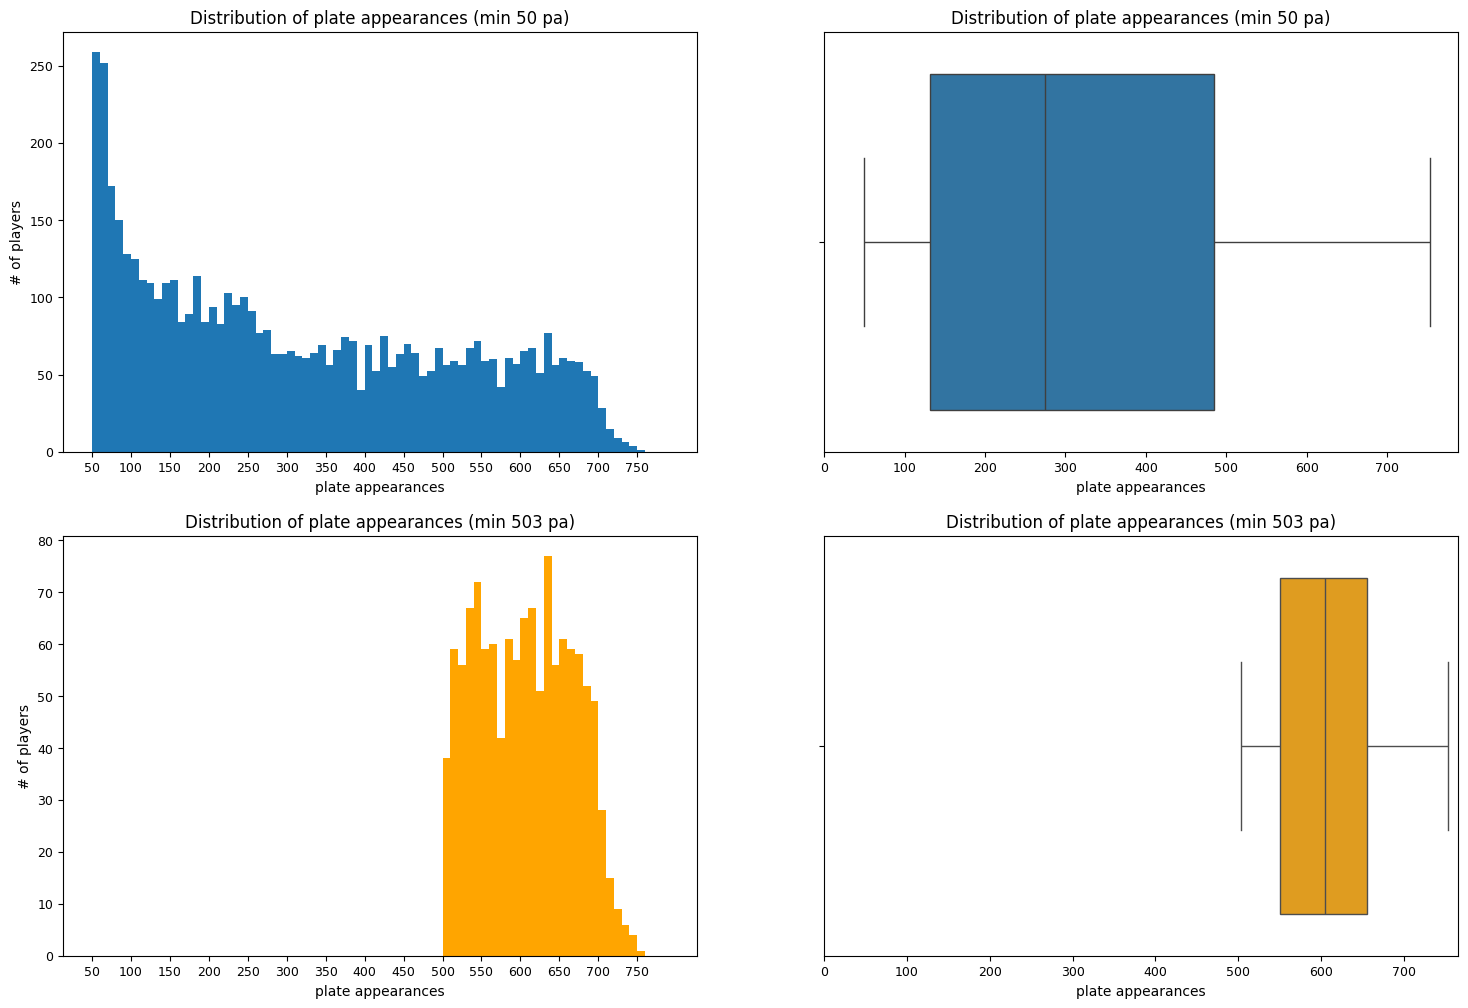

In [1472]:
# Set figure and axes
fig, ax = plt.subplots(2, 2, figsize=(18,12))

# Create hist of pa's for all data
ax[0][0].hist(df['pa'], bins=range(50, 800, 10))
ax[0][0].set_xticks(range(50, 800, 50))
ax[0][0].tick_params(axis='both', which='major', labelsize=9)
ax[0][0].set_title('Distribution of plate appearances (min 50 pa)')
ax[0][0].set_xlabel('plate appearances')
ax[0][0].set_ylabel('# of players')

# Create hist of pa's for those above cutoff value
ax[1][0].hist(df_min['pa'], bins=range(50, 800, 10), color='orange')
ax[1][0].set_xticks(range(50, 800, 50))
ax[1][0].tick_params(axis='both', which='major', labelsize=9)
ax[1][0].set_title('Distribution of plate appearances (min 503 pa)')
ax[1][0].set_xlabel('plate appearances')
ax[1][0].set_ylabel('# of players')

# Create boxplot of pa's for all data
sns.boxplot(x=df['pa'], ax=ax[0][1])
ax[0][1].set_title('Distribution of plate appearances (min 50 pa)')
ax[0][1].tick_params(axis='both', which='major', labelsize=9)
ax[0][1].set_xticks(range(0, 800, 100))
ax[0][1].set_xlabel('plate appearances')

# Create boxplot of pa's for those above cutoff value
sns.boxplot(x=df_min['pa'], ax=ax[1][1], color='orange')
ax[1][1].set_title('Distribution of plate appearances (min 503 pa)')
ax[1][1].tick_params(axis='both', which='major', labelsize=9)
ax[1][1].set_xticks(range(0, 800, 100))
ax[1][1].set_xlabel('plate appearances')

# Show plots
plt.show()

The plots are vertically aligned and have the same scale on the x-axis to better compare them. We can see the distributions are much less skewed, especially from the boxplots. The range of values above the 75th percentile is much smaller than for the whole dataset.

We will create another dataset for minimum plate appearances containing only rows with bat tracking metrics as well.

In [1473]:
df_tracking_min = df_tracking[df_tracking['pa'] >= pa_cutoff]
print('Stats for seasons with bat tracking metrics:')
print(df_tracking[['pa', 'batting_avg', 'home_run', 'slg_percent']].describe())

print('\nStats for seasons with bat tracking metrics and minimum number of pa:')
print(df_tracking_min[['pa', 'batting_avg', 'home_run', 'slg_percent']].describe())

Stats for seasons with bat tracking metrics:
                pa  batting_avg    home_run  slg_percent
count  1030.000000  1030.000000  1030.00000  1030.000000
mean    346.541748     0.236545    10.82233     0.385516
std     195.993013     0.038318     9.58084     0.083411
min      50.000000     0.077000     0.00000     0.129000
25%     168.000000     0.214000     3.00000     0.332000
50%     336.000000     0.239500     8.00000     0.384000
75%     508.000000     0.262000    16.00000     0.441000
max     753.000000     0.380000    58.00000     0.717000

Stats for seasons with bat tracking metrics and minimum number of pa:
               pa  batting_avg    home_run  slg_percent
count  262.000000   262.000000  262.000000   262.000000
mean   610.793893     0.259958   21.751908     0.440195
std     62.255526     0.025313    9.348279     0.061175
min    503.000000     0.196000    1.000000     0.296000
25%    556.000000     0.244250   15.000000     0.399000
50%    614.000000     0.258500   21

We should also check for any duplicates in our data.

In [1474]:
df.duplicated().sum()

np.int64(0)

With our concerns addressed up to this point, and knowing there is no missing or duplicated data, we can now begin to look at some of the more important statistics for our model. There are a number of continuious variables in our dataset, to get a better idea of what these look like, we can look at descriptive stats for all of them.

In [1475]:
# get list of all float64 columns
cont_vars = list(df.select_dtypes(['float64']).columns)

# print descriptive statistics
df[cont_vars].describe()

,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,xba,woba,xwoba,xobp,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,whiff_percent,swing_percent
count,5336.000000,5336.00000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000
mean,23.856466,7.99955,0.236105,0.385226,0.303714,0.233527,0.298851,0.299663,0.303084,88.003017,11.915667,32.462088,6.581372,35.019865,25.797189,47.649082
std,7.952476,3.43164,0.047529,0.098708,0.054743,0.039393,0.057990,0.052905,0.049835,2.657542,5.691268,5.855329,4.396887,9.569253,7.041802,5.376142
min,3.100000,0.00000,0.000000,0.000000,0.000000,0.022000,0.000000,0.040000,0.044000,72.500000,-37.500000,2.500000,0.000000,0.000000,4.700000,23.400000
25%,18.500000,5.70000,0.211000,0.329000,0.279000,0.213000,0.272000,0.274000,0.281000,86.400000,8.700000,29.500000,3.200000,29.400000,21.000000,44.000000
50%,23.100000,7.80000,0.242000,0.391000,0.310000,0.238000,0.305000,0.303000,0.308000,88.200000,12.300000,32.900000,6.100000,35.900000,25.400000,47.500000
75%,28.100000,10.10000,0.267000,0.448000,0.338000,0.259000,0.335000,0.332000,0.333000,89.800000,15.500000,36.100000,9.300000,41.600000,30.200000,51.100000
max,73.000000,24.60000,0.400000,0.755000,0.490000,0.359000,0.486000,0.479000,0.475000,97.600000,34.300000,51.900000,31.600000,65.400000,59.600000,74.300000


By comparing the max and min numbers, we can get a sense of which of these variables are on a scale of 0-1, and which aren't. There are some percentages and rates in the dataset that are either from 0 to 100, or 0 to 1. To avoid any confilcts when comparing these, I will convert all percentages on that scale to be between 0 and 1.

In [1476]:
df[['k_percent', 'bb_percent', 'sweet_spot_percent', 'hard_hit_percent', 'whiff_percent', 'swing_percent']] = df[['k_percent', 'bb_percent', 'sweet_spot_percent', 'hard_hit_percent', 'whiff_percent', 'swing_percent']] / 100
df_min[['k_percent', 'bb_percent', 'sweet_spot_percent', 'hard_hit_percent', 'whiff_percent', 'swing_percent']] = df_min[['k_percent', 'bb_percent', 'sweet_spot_percent', 'hard_hit_percent', 'whiff_percent', 'swing_percent']] / 100
df_tracking[['k_percent', 'bb_percent', 'sweet_spot_percent', 'hard_hit_percent', 'whiff_percent', 'swing_percent']] = df_tracking[['k_percent', 'bb_percent', 'sweet_spot_percent', 'hard_hit_percent', 'whiff_percent', 'swing_percent']] / 100
df_tracking_min[['k_percent', 'bb_percent', 'sweet_spot_percent', 'hard_hit_percent', 'whiff_percent', 'swing_percent']] = df_tracking_min[['k_percent', 'bb_percent', 'sweet_spot_percent', 'hard_hit_percent', 'whiff_percent', 'swing_percent']] / 100

/var/folders/t5/sf5l762d659dqb2h257h_7680000gn/T/ipykernel_42132/2325909219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min[['k_percent', 'bb_percent', 'sweet_spot_percent', 'hard_hit_percent', 'whiff_percent', 'swing_percent']] = df_min[['k_percent', 'bb_percent', 'sweet_spot_percent', 'hard_hit_percent', 'whiff_percent', 'swing_percent']] / 100
/var/folders/t5/sf5l762d659dqb2h257h_7680000gn/T/ipykernel_42132/2325909219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracking[['k_percent'

For the other variables that are not between 0 and 1, we can apply standard scaling when we create our models if needed.

Next, we can visualize some of the variables. To start, I want to look at batting average (ba) and expected batting average (xba). Expected batting average is a complicated statistic that computes the likelihood a player will get a hit. This metric is supposed to eliminate certain occurences where a player records a hit because of luck. I want to compare this to straight up batting average, which is the number of hits a player got divided by their total at bats, and see how similar or different these measruements are. We will use the dataframe with the minimum plate appearance cutoff enabled, since we know the data is fairly normally distributed already.

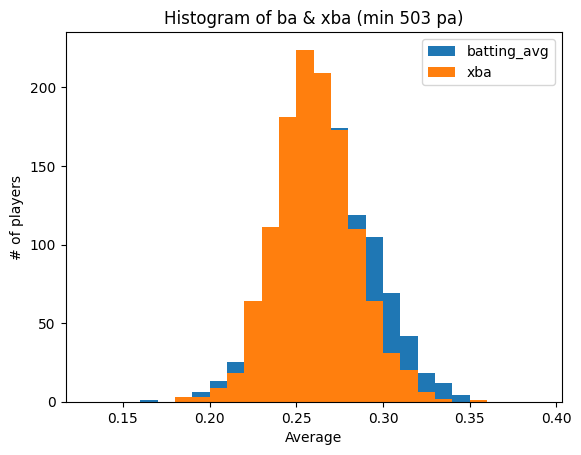

In [1477]:
# plotting histograms 
plt.hist(df_min['batting_avg'], label='batting_avg', bins=[x / 100.0 for x in range(13, 40, 1)]) 
plt.hist(df_min['xba'], label='xba',  bins=[x / 100.0 for x in range(13, 40, 1)]) 
  
plt.legend(loc='upper right') 
plt.title('Histogram of ba & xba (min 503 pa)') 
plt.ylabel('# of players')
plt.xlabel('Average')
plt.show()

We can verify the two stats are very similar. Normal batting average appears to have a slightly wider distribution especially on the upper end. This makes sense since xba is intended to eliminate lucky hits from being included.

Next, let's take a look at some power stats. RBIs and HRs are both discrete measurements that are totaled up throughout the season. Average swing speed is a newer stat that shows how fast a player swings their bat on average.

Let's create two scatterplots and identify which measurement, home runs or rbi's, more closely relates to a player's swing speed.

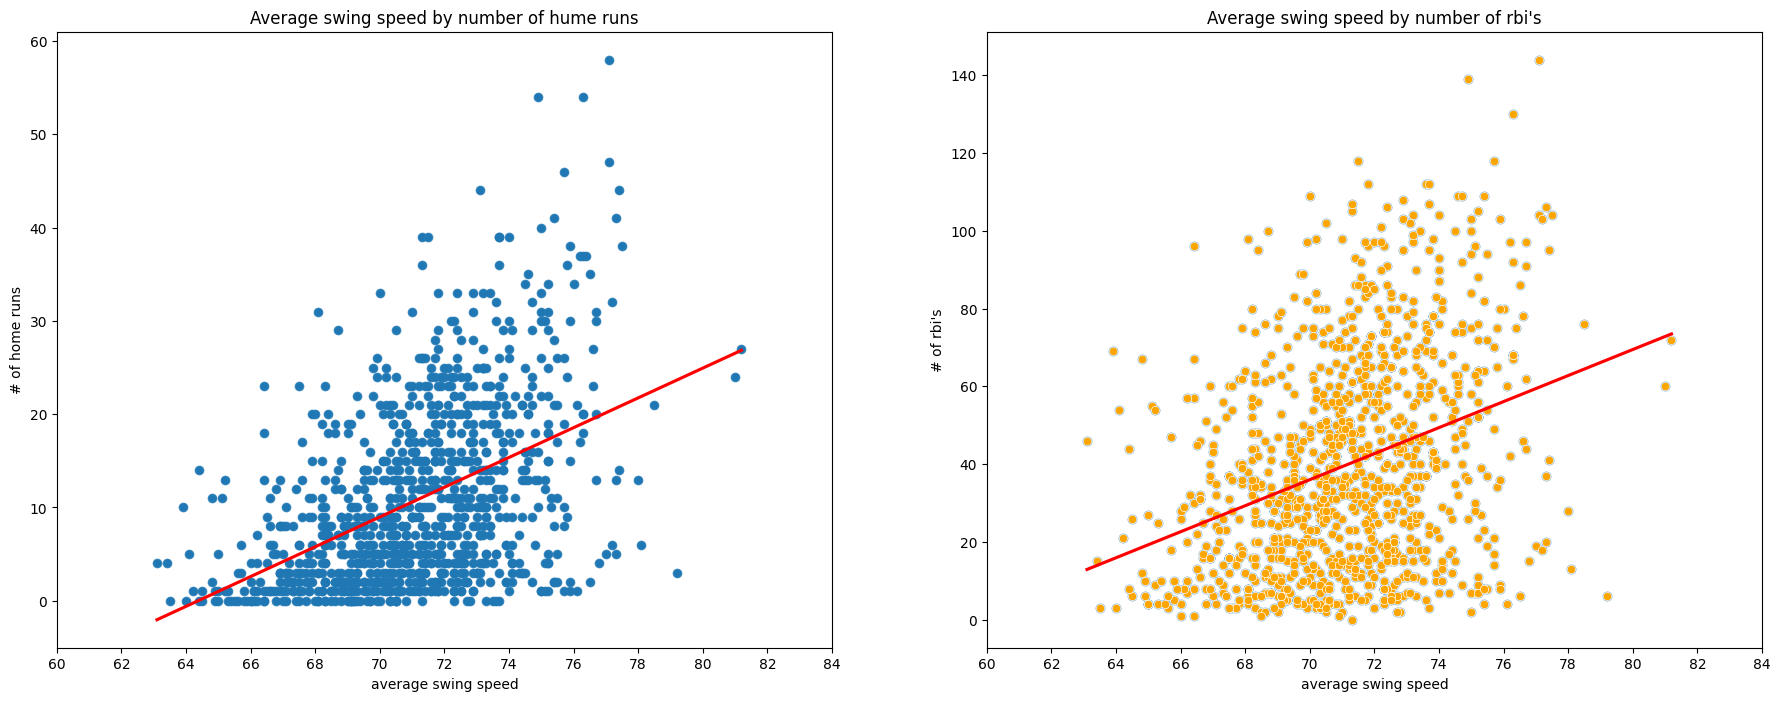

In [1478]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Create hr scatterplot
sns.scatterplot(data=df_tracking, x='avg_swing_speed', y='home_run', ax=ax[0])
sns.regplot(data=df_tracking, x='avg_swing_speed', y='home_run', ci=None, line_kws={"color": "red"}, ax=ax[0])
ax[0].set_xticks(range(60, 85, 2))
ax[0].set_title('Average swing speed by number of hume runs')
ax[0].set_xlabel('average swing speed')
ax[0].set_ylabel('# of home runs')

# Create rbi scatterplot
sns.regplot(data=df_tracking, x='avg_swing_speed', y='b_rbi', ci=None, line_kws={"color": "red"}, ax=ax[1])
sns.scatterplot(data=df_tracking, x='avg_swing_speed', y='b_rbi', color='orange', ax=ax[1])
ax[1].set_xticks(range(60, 85, 2))
ax[1].set_title("Average swing speed by number of rbi's")
ax[1].set_xlabel('average swing speed')
ax[1].set_ylabel("# of rbi's")

plt.show()

Both of these graphs show somewhat strong correlation. The spread of RBI's is much wider, but the best fit lines for both are nearly identical. This makes sense since if a player consistently swings the bat harder, they will hit the ball farther hitting more home runs and therefore gaining more RBI's.

Lastly, we can check out a correlation heat map to analyze all of our variablesa nd show which have strong correlation with each other. To do this we will use the pandas dunction corr(), which calculates the standard (Pearson) correlation coefficient. This number is a value between -1 and 1, with exactly 1 or -1 indicating a linear relationship perfectly describes X & Y. A positive value indicates positive correlation, a negative value indicates negative correlation.

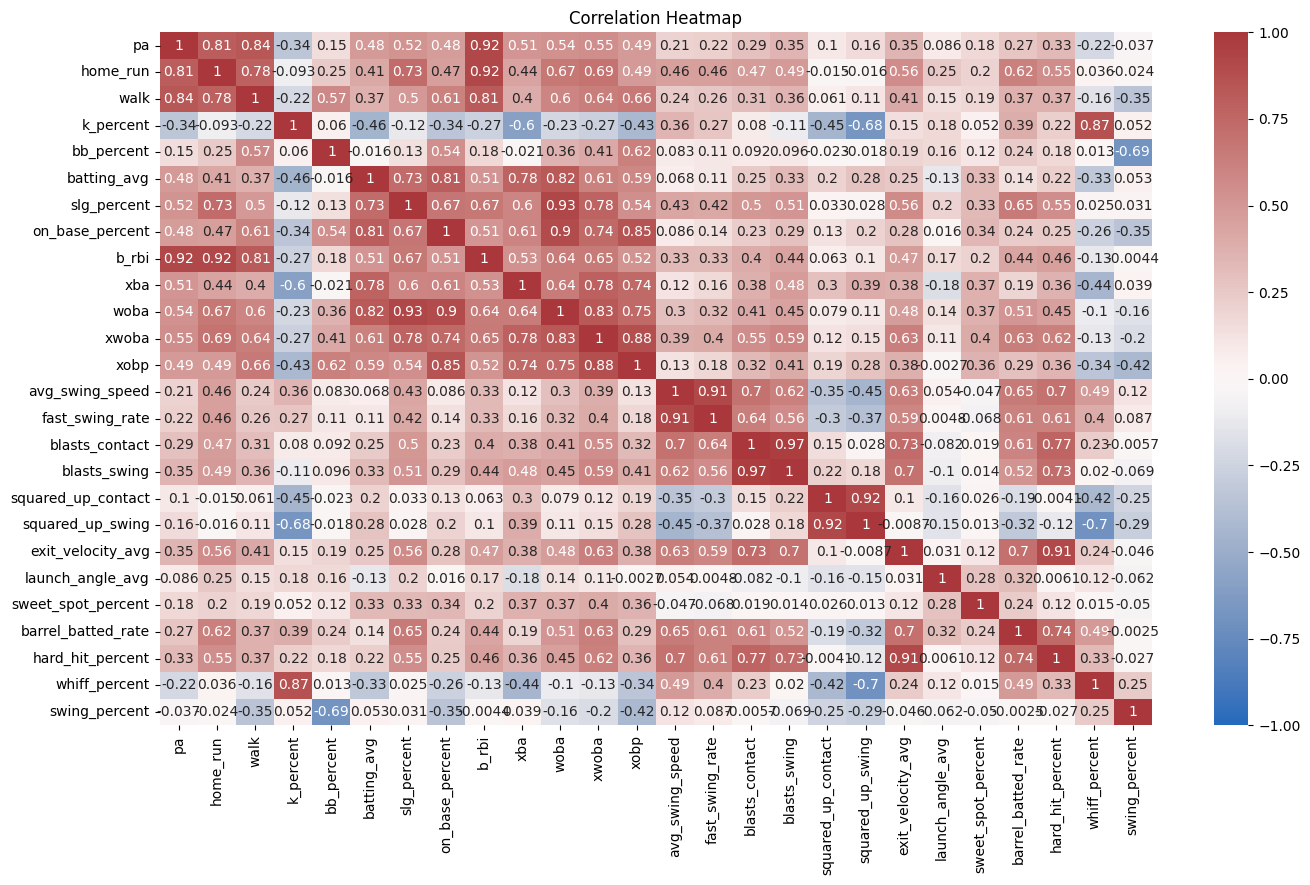

In [1479]:
plt.figure(figsize=(16,9))
sns.heatmap(df_tracking.iloc[:, 3:].corr(),vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
plt.title('Correlation Heatmap')
plt.show()

The main diagonal is always 1.0 since it is the same stat being compared to itself. Outside of this main diagonal, all squares with darker red coloring have higher correlcation with each other. From taking a quick look we can see that average swing speed has a 0.46 correlation with home runs, versus a 0.33 correlation with RBI's. Our visualizations earlier showed correlation amongst both comparisons, but the numbers themselves allow us to learn home runs correlate much higher.

One of the squares that sticks out if whiff_percent vs k_percent. Whiffing is when a player swings the bat and does not make contact with the ball. K percent, or strikeout percent, is the percentage of at-bats for a player that end in a strikeout. These two statistics being strtongly correlated indicates that players who swing-and-miss a lot, also strikeout a lot.

Our main statistic of interest, slugging percentage, has a few statistics it is highly correlated with. OBP, WOBA, and XWOBA in particular are all 0.77 or above.

# Analysis and Model Building

Before we begin building out models, we must first pick which type of problem we have. Slugging percentage is a continuous measurement, meaning the value has infinitely many outcomes, similar to someone's height. This means we have a regression problem. Regression problems have a lot of different models to choose from, we will train a few different ones and comnpare the results.

### Linear Regression

Before we move to training and fitting the model, let's make sure we meet the requirements for linear regression. Let's begin by checking the distrubution across all of our variables.

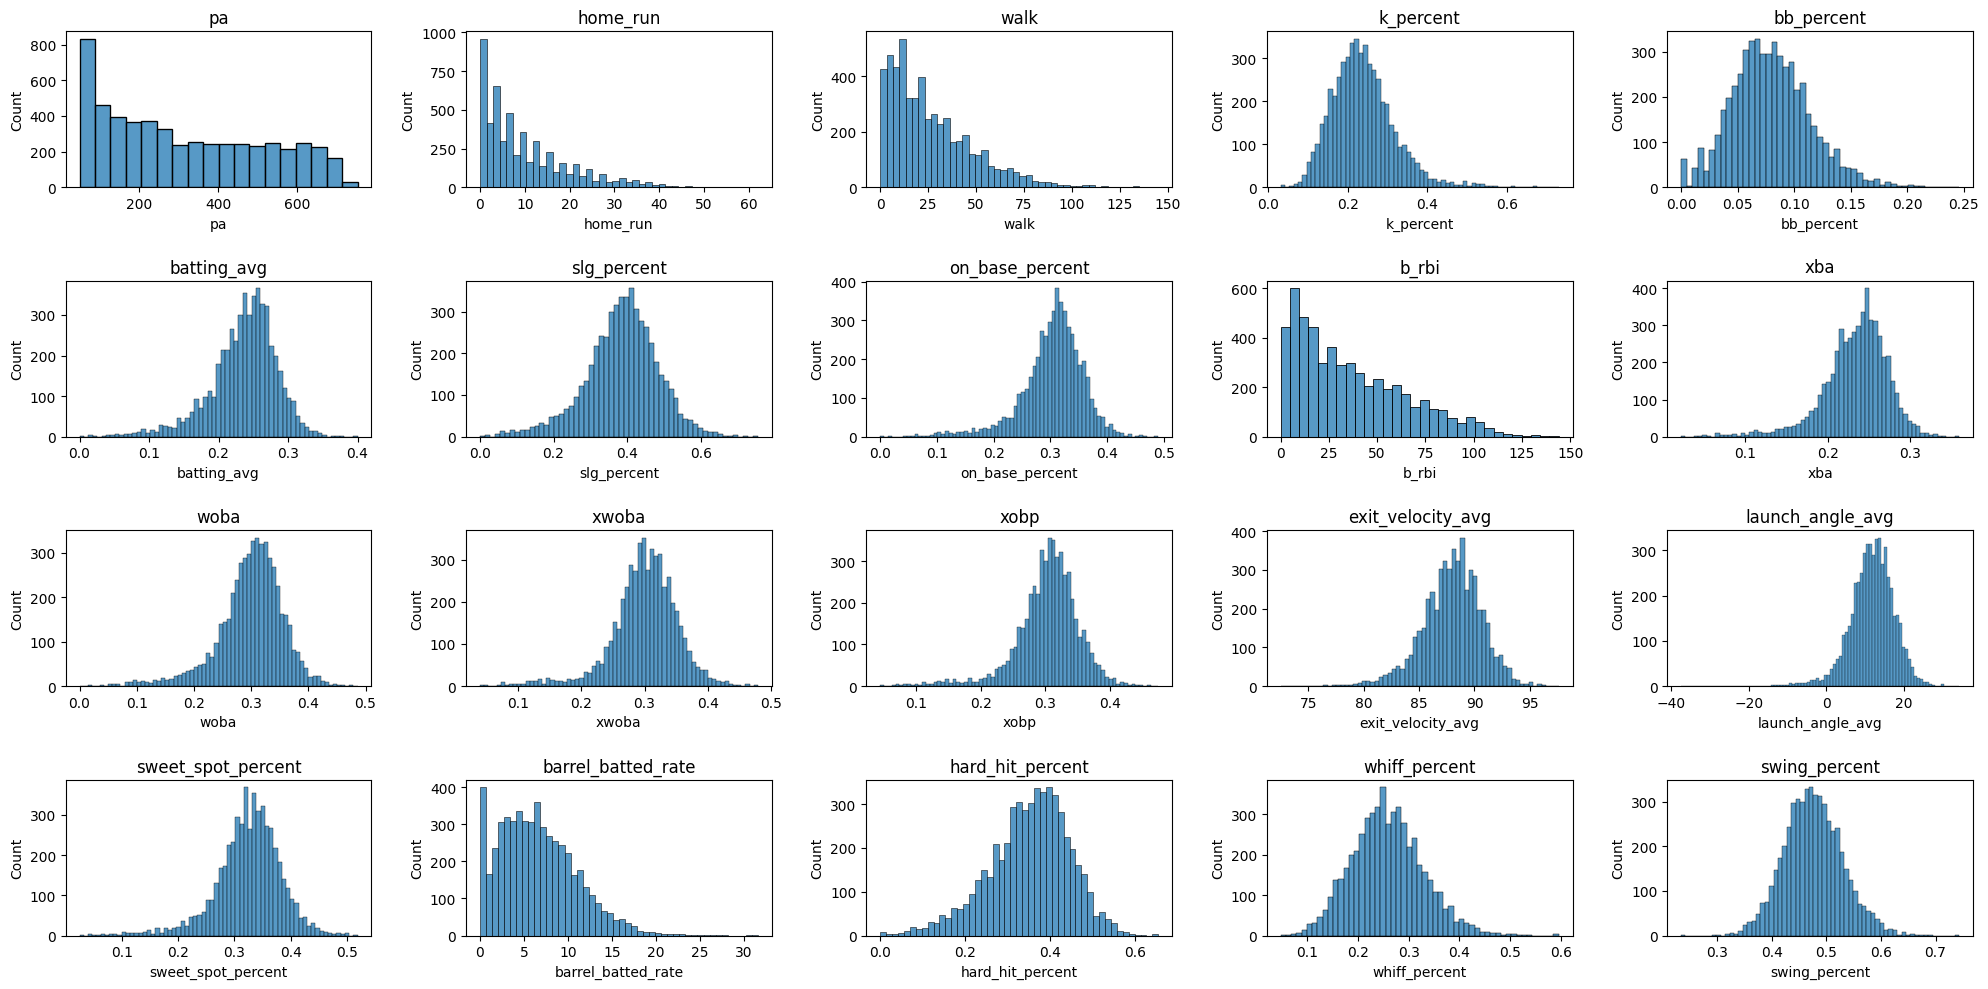

In [1480]:
# Create figure
fig, axes = plt.subplots(4,5, figsize=(20, 10))
ax = axes.flatten()

# Plot each field
for i, col in enumerate(df.iloc[:, 3:].columns):
    sns.histplot(df[col], ax=ax[i])
    ax[i].set_title(col)

# Fix padding to prevent overlap
fig.tight_layout(w_pad=2, h_pad=2)
plt.show()

Overall, much of our data has the traits of the classic bell curve which signals them being normally distrubuted. The only variables that do not reflect the bell curve are discrete variables, therefore this strategy of analysis does not apply to them.

In [1481]:
# Isolate predictor variables
X = df.iloc[:,3:]
X.drop(columns=['slg_percent'], inplace=True)

Next, we have to ensure there is no multucollinearity. This means, no two independent variables can be highly correlated with eachother. To idenfity any columns like this, we could create another heatmap with the leftover values and drop anything that stands out. Another method is to calculate the Variance Inflation Factor (VIF). VIF starts at 1, and has no upper limit. It can be interpreted as follows:

* A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model.
* A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.
* A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model.

I will also drop any power-related statistics since the target variable, slugging percentage, is a power metric.

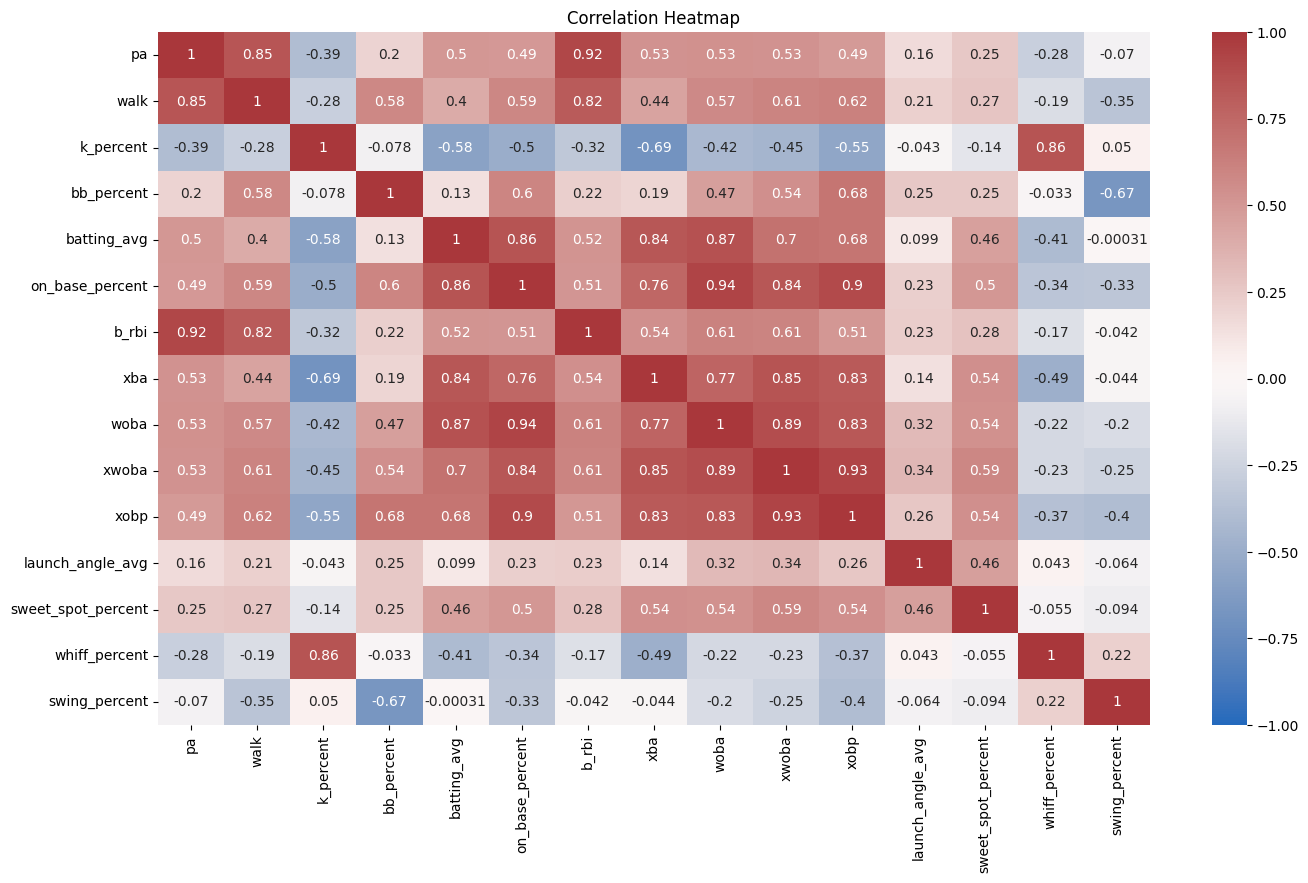

In [1482]:
# Drop power-related statistics
X.drop(columns=['home_run', 'exit_velocity_avg', 'barrel_batted_rate', 'hard_hit_percent'], inplace=True)

plt.figure(figsize=(16,9))
sns.heatmap(X.corr(),vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
plt.title('Correlation Heatmap')
plt.show()

The heatmap does result in many clusters of intensely red squares,  k_percent and whiff_percent are very highly correlated because a player that swings-and-misses frequently, will also strikeout frequently. To get a better idea of this, let's look at the VIF.

In [1483]:
# For VIF
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

print(vif)

             VIF            variable
0      44.514006                  pa
1      25.775073                walk
2      50.677621           k_percent
3     100.205042          bb_percent
4   10158.799344         batting_avg
5   21226.810204     on_base_percent
6      28.071552               b_rbi
7   10026.723959                 xba
8     997.878278                woba
9    1361.767426               xwoba
10  20992.484971                xobp
11      9.610195    launch_angle_avg
12     71.054613  sweet_spot_percent
13     79.686148       whiff_percent
14     99.034309       swing_percent


As we can see from the high VIF scores, we do have high multicolinearity. This makes sense since there are so many variables that are related to each other. Before we drop a bunch of columns to try and fix this, let's center all of our data first and see the results.

In [1484]:
# Centering formula
center_function = lambda x: x - x.mean()

# Center data and check VIF
X = center_function(X)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

print(vif)

           VIF            variable
0    13.060989                  pa
1    10.439394                walk
2     8.344426           k_percent
3    15.702100          bb_percent
4   400.093999         batting_avg
5   678.875585     on_base_percent
6    10.831559               b_rbi
7   278.320776                 xba
8    36.488132                woba
9    43.947616               xwoba
10  576.374722                xobp
11    1.815079    launch_angle_avg
12    2.311101  sweet_spot_percent
13    6.155199       whiff_percent
14    2.533173       swing_percent


This reduced our VIF by quite a bit, now we can drop some of the more problematic columns.

In [1485]:
# Dropping high VIF columns
X.drop(columns=['on_base_percent', 'xobp', 'xwoba', 'woba', 'pa', 'whiff_percent', 'walk', 'xba'], inplace=True)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

print(vif)

        VIF            variable
0  1.576231           k_percent
1  2.090069          bb_percent
2  2.375074         batting_avg
3  1.479676               b_rbi
4  1.405299    launch_angle_avg
5  1.727440  sweet_spot_percent
6  1.898051       swing_percent


Now, let's train a linear regression model. We will begin with the data without the minimum plate appearances cutoff value applied, and train both the standard stats, and the dataframe with bat tracking metrics to see which one is better.

In [1486]:
# Isolate target variable
y = df['slg_percent']

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Create linear regression model and fit it to the training dataset
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Use the model to get prediction on the test set
y_pred = lin_reg.predict(X_test)

Let's print out some values of our predictions next the values of our test data to get an idea of our performance.

In [1487]:
comp = pd.DataFrame(y_test)
comp['predictions'] = y_pred.tolist()
comp.rename(columns={'slg_percent' : 'test'}, inplace=True)
comp['diff'] = comp['test'] - comp['predictions']
comp.head(10)

,test,predictions,diff
1158,0.488,0.461126,0.026874
1860,0.376,0.412735,-0.036735
3089,0.255,0.291507,-0.036507
803,0.293,0.319063,-0.026063
168,0.422,0.434228,-0.012228
5330,0.500,0.507373,-0.007373
5290,0.376,0.382999,-0.006999
3773,0.317,0.343132,-0.026132
2892,0.433,0.398848,0.034152
1047,0.262,0.288662,-0.026662


We can evaluate our model's performance by calculating the mean squared error and mean absolute error across the entire dataset. To understand better what exactly we are comparing, the metrics are defined as:

* **Mean Squared Error (MSE)**: The difference between the original and predicted values extracted by squared the average difference over the data set.
* **Mean Absolute Error (MAE)**: The difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* **R-Squared (Coefficient of Determination)**: The coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [1488]:
# Evaluate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print values
print('Evlaution of Linear Regression model for standard stats and at least 50 pa:')
print(f'Mean Squared Error: {mse:.8f}') 
print(f'Mean Absolute Error: {mae:.8f}')
print(f'R-Squared: {r2:.5f}')

# Store into table for later use
results = pd.DataFrame(columns=['Data', 'MSE', 'MAE', 'R2'])
results.loc[len(results)] = ["Std_Stats", mse, mae, r2]

Evlaution of Linear Regression model for standard stats and at least 50 pa:
Mean Squared Error: 0.00196617
Mean Absolute Error: 0.03442724
R-Squared: 0.79801


Our has a great MSE and MAE score. Let's create an Ordinary Least Squares summary so that we can analyze each independent variable on it's own.

In [1489]:
lin_reg = smf.ols(formula='slg_percent ~ k_percent + bb_percent + batting_avg + b_rbi + launch_angle_avg + sweet_spot_percent + swing_percent', data=df).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            slg_percent   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     3047.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        11:37:32   Log-Likelihood:                 9081.0
No. Observations:                5336   AIC:                        -1.815e+04
Df Residuals:                    5328   BIC:                        -1.809e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1834      0.010    -18.736      0.000      -0.203      -0.164
k_percent              0.2712      0.010     28.415      0.000       0.252       0.290
bb_percent             0.3341      0.025     13.117      0.000       0.284       0.384
batting_avg            1.5677      0.020     79.976      0.000       1.529       1.606
b_rbi                  0.0009   2.59e-05     34.659      0.000       0.001       0.001
launch_angle_avg       0.0035      0.000     28.148      0.000       0.003       0.004
sweet_spot_percent    -0.0074      0.014     -0.544      0.587      -0.034       0.019
swing_percent          0.0729      0.015      4.704      0.000       0.043       0.103
==============================================================================
Omnibus:                      568.272   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1122.491
Skew:                           0.690   Prob(JB):                    1.80e-244
Kurtosis:                       4.773   Cond. No.                     2.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-values for all of our predictor variables aside from sweet spot percent are very low, indicating our results are statistically significant. If we look at sweet spot percent, we can learn that the coefficient is very low. This means it's overall impact on slugging percentage is not high to begin with, but due to it's high p-value, we cannot reliably say this evaluation is accurate from our data.

We also have very high positive association between walk rate (bb_percent), batting average, and our target variable slugging percentage. In the MLB, a walk does not count as an at-bat for a player, only a plate appearance. When we looked at the formula for slugging percentage earlier, we saw it is calculated by dividing by the number of at-bats a player has had. A player that is able to get many walks will be able to lower this number, increasing their slugging percentage overall.

Now, let's do the same model building and analysis but for our dataset with the minimum plat appearance cutoff value of 503 applied and compare it's performance to this one.

In [1490]:
# Get predictor and target variables, perform train test split, create and fit to model, make predictions on test data, calculate metrics
X = df_min[['k_percent', 'bb_percent', 'batting_avg', 'b_rbi', 'launch_angle_avg', 'sweet_spot_percent', 'swing_percent']]
y = df_min['slg_percent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

lin_reg_min = LinearRegression()
lin_reg_min.fit(X_train, y_train)

y_pred = lin_reg_min.predict(X_test)

# Evaluate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print values
print('Evlaution of Linear Regression model for standard stats and at least 503 pa:')
print(f'Mean Squared Error: {mse:.8f}') 
print(f'Mean Absolute Error: {mae:.8f}')
print(f'R-Squared: {r2:.5f}')

# Store into table for later use
results.loc[len(results)] = ["Std_Stats_Min", mse, mae, r2]

Evlaution of Linear Regression model for standard stats and at least 503 pa:
Mean Squared Error: 0.00070550
Mean Absolute Error: 0.02136637
R-Squared: 0.81271


In [1491]:
lin_reg_min = smf.ols(formula='slg_percent ~ k_percent + bb_percent + batting_avg + b_rbi + launch_angle_avg + sweet_spot_percent + swing_percent', data=df).fit()
lin_reg_min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            slg_percent   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     3047.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        11:37:32   Log-Likelihood:                 9081.0
No. Observations:                5336   AIC:                        -1.815e+04
Df Residuals:                    5328   BIC:                        -1.809e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1834      0.010    -18.736      0.000      -0.203      -0.164
k_percent              0.2712      0.010     28.415      0.000       0.252       0.290
bb_percent             0.3341      0.025     13.117      0.000       0.284       0.384
batting_avg            1.5677      0.020     79.976      0.000       1.529       1.606
b_rbi                  0.0009   2.59e-05     34.659      0.000       0.001       0.001
launch_angle_avg       0.0035      0.000     28.148      0.000       0.003       0.004
sweet_spot_percent    -0.0074      0.014     -0.544      0.587      -0.034       0.019
swing_percent          0.0729      0.015      4.704      0.000       0.043       0.103
==============================================================================
Omnibus:                      568.272   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1122.491
Skew:                           0.690   Prob(JB):                    1.80e-244
Kurtosis:                       4.773   Cond. No.                     2.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we can move on to looking at the data with bat tracking data. We will perform the same initial evaluation to identify any multicolinearity.

In [1492]:
# Store and center data
X = df_tracking.iloc[:,3:]
X.drop(columns=['slg_percent'], inplace=True)

X = center_function(X)

In [1493]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

print(vif)

           VIF            variable
0    14.264207                  pa
1    14.091733            home_run
2    13.143346                walk
3     9.414796           k_percent
4    13.288904          bb_percent
5   383.735969         batting_avg
6   587.768010     on_base_percent
7    18.666513               b_rbi
8   262.208403                 xba
9    29.383009                woba
10   74.985437               xwoba
11  492.722273                xobp
12   12.487400     avg_swing_speed
13    8.651093     fast_swing_rate
14   98.813006      blasts_contact
15   94.290816        blasts_swing
16   28.140012  squared_up_contact
17   41.559481    squared_up_swing
18    7.045715   exit_velocity_avg
19    1.878974    launch_angle_avg
20    2.063513  sweet_spot_percent
21   13.425747  barrel_batted_rate
22    9.239028    hard_hit_percent
23   12.341527       whiff_percent
24    3.316357       swing_percent


In [1494]:
# Remove columns with high VIF
X.drop(columns=['xobp', 'blasts_contact', 'xwoba', 'on_base_percent', 'squared_up_swing', 'pa', 'home_run', 'woba', 'avg_swing_speed', 'hard_hit_percent', 'k_percent', 'walk'], inplace=True)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

print(vif)

         VIF            variable
0   2.391071          bb_percent
1   2.740177         batting_avg
2   2.023081               b_rbi
3   5.294554                 xba
4   2.606366     fast_swing_rate
5   2.864194        blasts_swing
6   1.783491  squared_up_contact
7   3.242992   exit_velocity_avg
8   1.668267    launch_angle_avg
9   1.745098  sweet_spot_percent
10  4.011125  barrel_batted_rate
11  3.349722       whiff_percent
12  2.680935       swing_percent


In [1495]:
# Get predictor and target variables, perform train test split, create and fit to model, make predictions on test data, calculate metrics
y = df_tracking['slg_percent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

# Evaluate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print values
print('Evlaution of Linear Regression model for full stats and at least 50 pa:')
print(f'Mean Squared Error: {mse:.8f}') 
print(f'Mean Absolute Error: {mae:.8f}')
print(f'R-Squared: {r2:.5f}')

# Store into table for later use
results.loc[len(results)] = ["Full_Stats", mse, mae, r2]

Evlaution of Linear Regression model for full stats and at least 50 pa:
Mean Squared Error: 0.00100874
Mean Absolute Error: 0.02367796
R-Squared: 0.84204


In [1496]:
# Get predictor and target variables, perform train test split, create and fit to model, make predictions on test data, calculate metrics
X = df_tracking_min[['bb_percent', 'batting_avg', 'b_rbi', 'xba', 'fast_swing_rate',
       'blasts_swing', 'squared_up_contact', 'exit_velocity_avg',
       'launch_angle_avg', 'sweet_spot_percent', 'barrel_batted_rate',
       'whiff_percent', 'swing_percent']]
y = df_tracking_min['slg_percent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

lin_reg_min = LinearRegression()
lin_reg_min.fit(X_train, y_train)

y_pred = lin_reg_min.predict(X_test)

# Evaluate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print values
print('Evlaution of Linear Regression model for full stats and at least 50 pa:')
print(f'Mean Squared Error: {mse:.8f}') 
print(f'Mean Absolute Error: {mae:.8f}')
print(f'R-Squared: {r2:.5f}')

# Store into table for later use
results.loc[len(results)] = ["Full_Stats_Min", mse, mae, r2]

Evlaution of Linear Regression model for full stats and at least 50 pa:
Mean Squared Error: 0.00042342
Mean Absolute Error: 0.01655755
R-Squared: 0.89596


In [1497]:
print(results)

             Data       MSE       MAE        R2
0       Std_Stats  0.001966  0.034427  0.798009
1   Std_Stats_Min  0.000706  0.021366  0.812710
2      Full_Stats  0.001009  0.023678  0.842038
3  Full_Stats_Min  0.000423  0.016558  0.895965


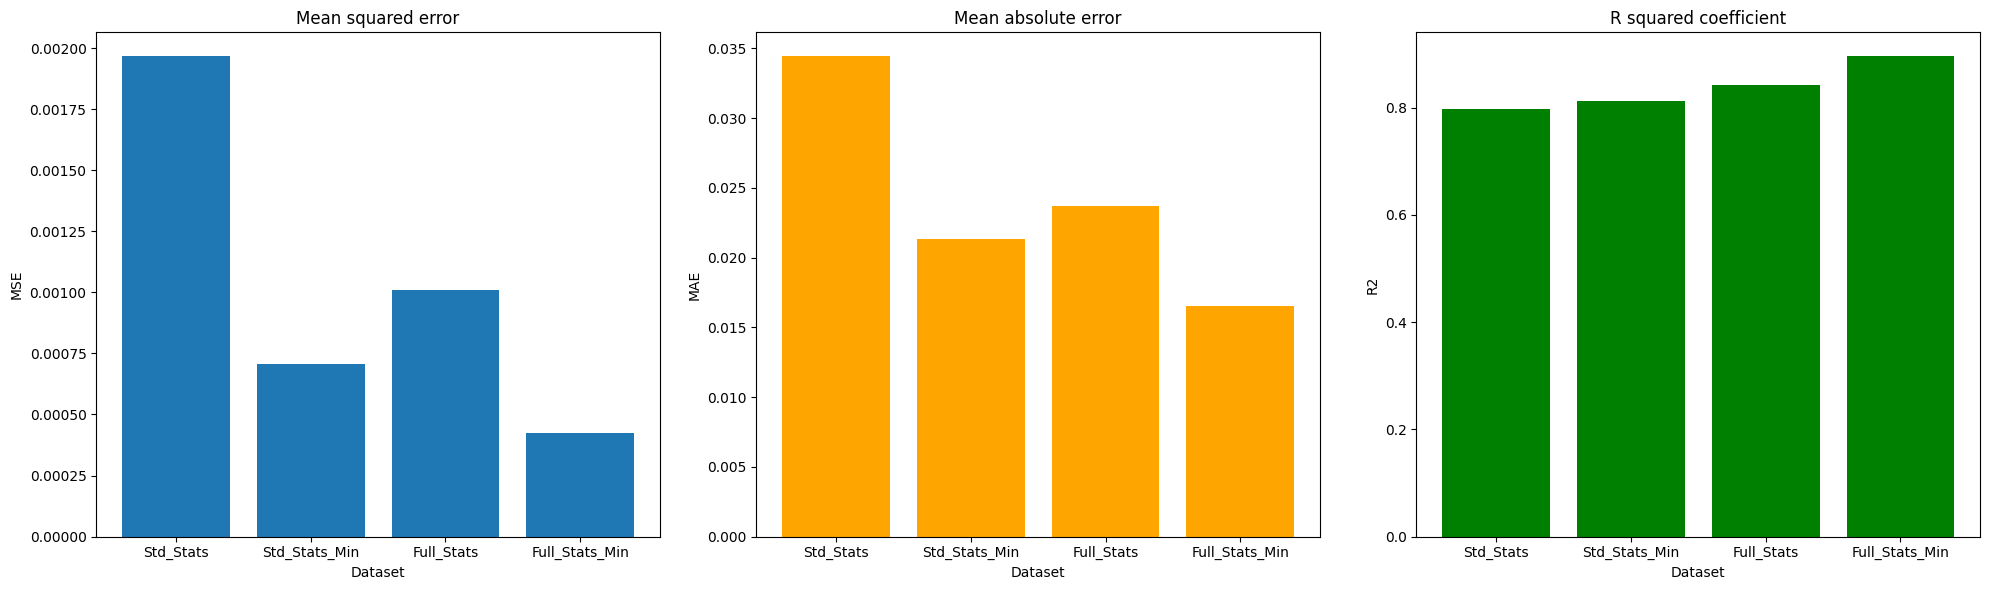

In [1498]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))

# Plot each field
ax[0].bar(x=results.iloc[:, 0], height=results.iloc[:, 1])
ax[0].set_title('Mean squared error')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Dataset')

ax[1].bar(x=results.iloc[:, 0], height=results.iloc[:, 2], color='orange')
ax[1].set_title('Mean absolute error')
ax[1].set_ylabel('MAE')
ax[1].set_xlabel('Dataset')

ax[2].bar(x=results.iloc[:, 0], height=results.iloc[:, 3], color='green')
ax[2].set_title('R squared coefficient')
ax[2].set_ylabel('R2')
ax[2].set_xlabel('Dataset')

# Fix padding to prevent overlap
fig.tight_layout(w_pad=2, h_pad=2)
plt.show()

Each of the columns in the above graphs represent a different filtering of the dataset. Std_Stats refers to that group of data not having bat-tracking metrics, whereas Full_Stats contains bat-tracking. The columns labeled with Min represent the groups that have the minimum pa cutoff number applied.

The first two graphs show MSE and MAE. A lower score is better. We can see that the bat-tracking statistics do improve our model by almost a factor of 2. We can also observe a significant improvement when applying the minimum cutoff value. This makes sense because these two evaluators measure how far each value is from the mean, therefore a lot of the more random values that can be attributed to only having a small amount of plate appearances and they can throw off our values.

The third graph measures the coefficient of determinent, or R-squared. For this evaluator, a higher score (closer to 1) is better. This measures how closely our data can be represented by the linear regression model; it measures how closely our data can be modeled by a straight line. Interestingly, when analyzing this graph, we don't see the same pattern as the other two. The group of data including bat-tracking statistics performs much better than either of the groups without, regardless of the minimum plate appearances.

There are multiple ways we can interpret this. First, the bat-tracking statistics do describe how well a batter hits a ball, which will translate to more power. Having access to this extra data is important and significant. Another way to interpret this is the group with bat-tracking stats does contain much less rows of data.

In [1499]:
print(f'Number of rows in Std_Stats: {df.shape[0]}')
print(f'Number of rows in Std_Stats_Min: {df_min.shape[0]}')
print(f'Std_Stats contains {(df.shape[0] / df_min.shape[0])*100:.0f}% more data')

Number of rows in Std_Stats: 5336
Number of rows in Std_Stats_Min: 1229
Std_Stats contains 434% more data


Regardless of how we read this, more data will always be important to improve our models and get more accurate predictions. Bat-tracking stats clearly do positively impact the ability of slugging percentage to be predicted by linear regression, but how significant that is will require more testing.

### Decision Trees
Another model we can use on our data is a Decision Tree Regressor. A decision tree is very similar to a flow chart. Starting at the top, the model will ask questions about our data, split it, then repeat the process with the splot data. A question could be for example, "Did this player hit more than 20 home runs?" All seasons that have more than 20 in the home_run column would go to the right branch, the other seasons would go to the left branch, then those two subsets of the data would each get another question that would split them and so on.

Since we are predicting a continuous variable, slugging percentage, we will be using a regression tree. There are not any prerequisites for a regression tree and they can handle collinearity very well. This will enable us to use all columns of our data.

In [1500]:
# Isolate predictor and target variables
X = df.iloc[:,3:]
X.drop(columns=['slg_percent'], inplace=True)

y = df['slg_percent']

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define model
dt = DecisionTreeRegressor(random_state=0)

Unlike linear regressors, regression trees have a lot of hyperparameters that need tuning. Hyperparameters are options or values that can be set prior to fitting the model to our traning data and tuning these hyperparameters refers to identifying the best values they should be set to that will give us the best results.

The hyperparameters we are going to set and what they do are:
* ```max_depth```: How many layers the tree stops at. This controls how many times the data can be split before finishing. A deeper tree can better model complex data, however, too deep will result in **overfitting** which is when the model too closely fits our training data and ends up performing worse in testing.
* ```min_samples_split```: The minimum number of samples needed to split a node. This value defines how many samples must be present in a node for it to be split further. For example, in the above case where we looked at home runs, let's instead split our data is a player hits over 50 home runs. This would result in much fewer rows of our data satisfying the condition, if the number of rows was fewer than what we set, that node would not get another question to split in the next layer, it would turn into a leaf node and remain unchanged.
* ```min_samples_leaf```: The minimum number of samples required to be considered a leaf. This also prevents further splitting but in the reverse manner. A node will not be split in the layer above if it results in a leaf with less samples than this value.

To help us find the best values for our hyperparameters, we will use a built-in function called grid search. Grid search accepts multiple values for these hyperparameters, and tests every possible combination, saving the values that produced the best model in terms of what evaluator we select.

In [1501]:
# Dictionary of hyperparameters to search over
cv_params = {'max_depth': [8, 12, 16, None],
             'min_samples_split': [10, 20, 50],
             'min_samples_leaf': [10, 20, 50, 75]
            }

# Dictionary of scoring metrics
scoring = dict.fromkeys(['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'])

# Instantiate Grid Search
tree1 = GridSearchCV(dt, cv_params, scoring=scoring, cv=4, refit='r2')

In [1502]:
# Fit model to data
tree1.fit(X_train, y_train);

Let's look at some of the results to see how it performed.

In [1503]:
print(f'Best score: {tree1.best_score_:.5f}')
print(f'Best parameters: {tree1.best_params_}')

Best score: 0.96466
Best parameters: {'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 10}


The model has a very high score, but the best parameters are all of our smallest values listed. I will perform another grid search, but this time with different, smaller values for my hyperparameters and see if this results in a better model.

In [1504]:
cv_params = {'max_depth': [8, 12, 16, None],
             'min_samples_split': [3, 5, 10],
             'min_samples_leaf': [2, 4, 6, 10]
            }

tree2 = GridSearchCV(dt, cv_params, scoring=scoring, cv=4, refit='r2')

tree2.fit(X_train, y_train)

print(f'Best score: {tree2.best_score_:.5f}')
print(f'Best parameters: {tree2.best_params_}')

Best score: 0.96698
Best parameters: {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 3}


The resulting score is almost the same as the previous model, but we can see different parameters were chosen.

We can visualize these trees to get a better idea of what is going on.

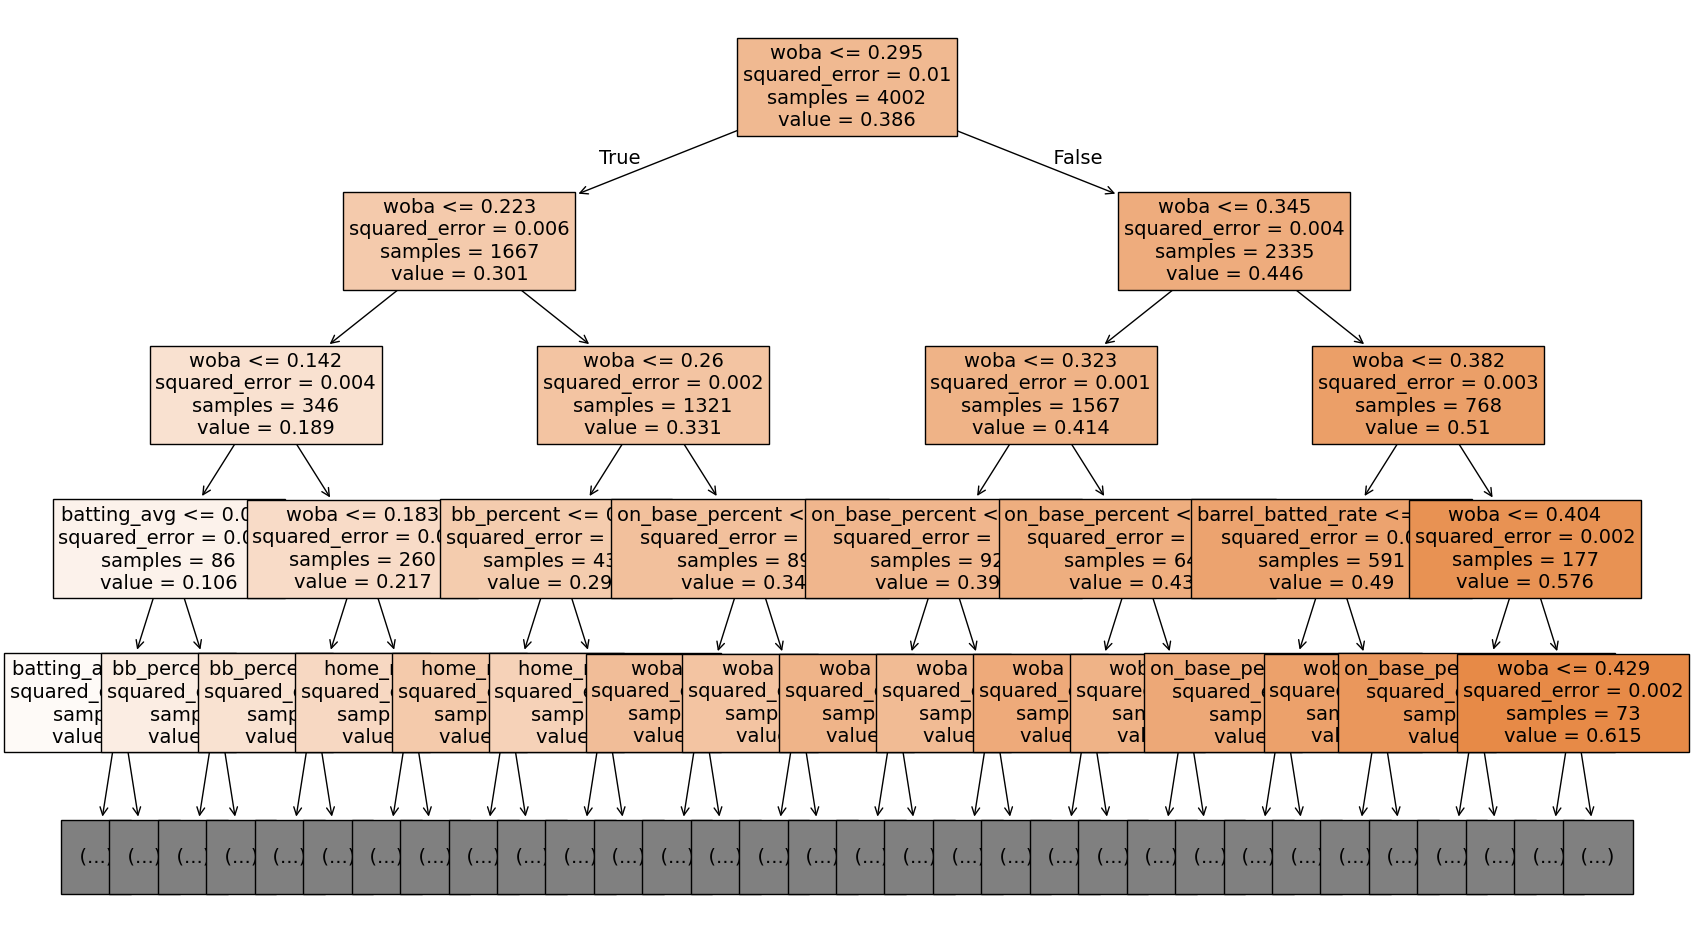

In [1505]:
# Plot the tree
plt.figure(figsize=(20,12))
tree.plot_tree(tree1.best_estimator_, max_depth=4, fontsize=14, feature_names=X.columns, class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

The nice part about visualizing a tree is that we can identify what category is most effective at splitting the data. Weighted on base average in particular shows up a lot. wOBA is the measurement of how far a player makes it around the bases for each at bat. This is very closely related to slugging percentage, so we definitly expect it to have a large impact. The other categories that show up a lot are home runs and walk rate. These two stats are very simple to predict for a player, and still have a large impact on that player's slugging percentage.

Let's now create a helper function that can extract more metrics from our models, and allow us to compare them more efficiently.

In [1506]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): mse, mae, or r2
        
    Returns a pandas df with the MSE, MAE, and R2 scores for the model with the best mean 'metric' score across all validation folds.
    '''
    
    # Create dictionary that maps input metric to actual metric name in␣GridSearchCV
    metric_dict = {'r2': 'mean_test_r2',
                   'MSE': 'mean_test_neg_mean_squared_error',
                   'MAE': 'mean_test_neg_mean_absolute_error'
                }
    
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extract MSE, MAE, and R2 score from that row
    r2 = best_estimator_results.mean_test_r2
    mse = 1 - best_estimator_results.mean_test_neg_mean_squared_error
    mae = 1 - best_estimator_results.mean_test_neg_mean_absolute_error
    
    # Create table of resuls
    table = pd.DataFrame()
    
    table = pd.DataFrame({'model': [model_name],
                          'r2': [r2],
                          'MSE': [mse],
                          'MAE': [mae]
                        })
    return table

In [1507]:
tree1_cv_results = make_results('decision tree cv', tree2, 'r2')
tree1_cv_results

,model,r2,MSE,MAE
0,decision tree cv,0.966979,0.033021,0.033021


Earlier, I mentioned the potential for a decision tree model to overfit the data. When we changed our hyperparameters to allow for smaller leaf nodes, we saw a slight increase in the score of our model, however, we don't really know if it's overfitting the data. An alternative to decision trees is the Random Forest Regressor. A random forest is a model that creates and averages out multiple decision trees. It has the same strengths as decision trees, but is less prone to overfitting since it is an average of multiple results. However, random forests are much harder to interpret, so they should not be used with data where understanding how the model is making predictions is very important such as medical or financial models.

In [1508]:
# Instantiate model
rf = RandomForestRegressor(random_state=0)

cv_params = {'max_depth': [8, 12, 16, None],
             'min_samples_split': [10, 20, 50],
             'min_samples_leaf': [10, 20, 50, 75]
            }

# Perform grid search
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='r2')

# Fit to training data
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [8, 12, 16, None],
                         'min_samples_leaf': [10, 20, 50, 75],
                         'min_samples_split': [10, 20, 50]},
             refit='r2',
             scoring={'neg_mean_absolute_error': None,
                      'neg_mean_squared_error': None, 'r2': None})

In [1509]:
rf1_cv_results = make_results('random forest cv', rf1, 'r2')
print(tree1_cv_results)
print(rf1_cv_results)

              model        r2       MSE       MAE
0  decision tree cv  0.966979  0.033021  0.033021
              model        r2       MSE       MAE
0  random forest cv  0.977083  0.022917  0.022917


We can see the random forest performs better overall with our data. Let's create another helper function, but this one will extract all the scores from our model's predictions on the testing data.

In [1510]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.
    
    In:
    model_name (string): How you want your model to be named in the output table
    model:          A fit GridSearchCV object
    X_test_data:    numpy array of X_test data
    y_test_data:    numpy array of y_test data
    
    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''
    preds = model.best_estimator_.predict(X_test_data)
    r2 = r2_score(y_test_data, preds)
    mse = mean_squared_error(y_test_data, preds)
    mae = mean_absolute_error(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                          'r2': [r2],
                          'MSE': [mse],
                          'MAE': [mae]
                        })
    return table

In [1511]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,r2,MSE,MAE
0,random forest1 test,0.981507,0.00018,0.009463


In [1512]:
results_tree = pd.DataFrame(columns=['Data', 'MSE', 'MAE', 'R2'])
results_tree.loc[len(results_tree)] = ["Std_Stats", rf1_test_scores['MSE'].values[0], rf1_test_scores['MAE'].values[0], rf1_test_scores['r2'].values[0]]
print(results_tree)

        Data      MSE       MAE        R2
0  Std_Stats  0.00018  0.009463  0.981507


Our numbers look really good. The model is actually performing better on the testing data than the training data. This could be a potential problem, so it would be beneficial to look at the learning curve of our model to see how we are fitting the data.

A learning curve like the one above shows the average of how close the predicted value is the true value in the testing data set with different amounts of data used for training. We should see a smooth curve, where the validation error is getting closer to the training error as the size of the data increases. There should be no random jumps in graphs and they should not begin to diverge either.

In [ ]:
# Helper function to create learning curve
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(estimator, data[features], data[target], train_sizes = train_sizes,cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,.0005)

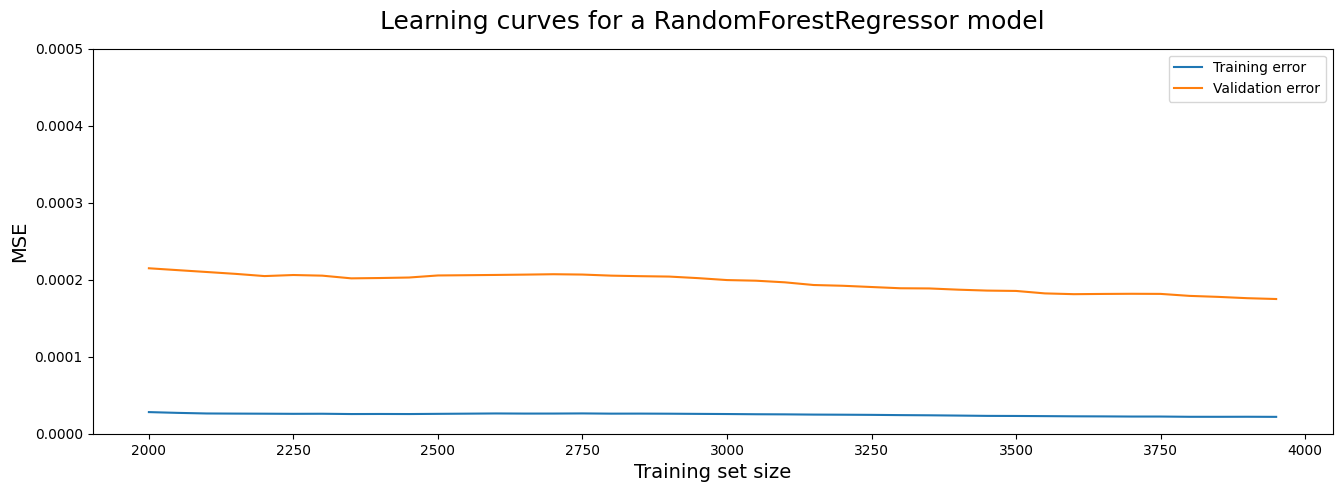

In [1515]:
plt.figure(figsize = (16,5))
# plt.subplot(1,2,i)
learning_curves(rf, df, X_train.columns, 'slg_percent', range(2000, 4000, 50), 4)

There is nothing obvious that sticks out from our learning curve, so we are good to move on with the model.

Now let's use the same random forest regressor and fit it to our other data sets, starting with the standard statistics after plate appereance cutoff.

In [1516]:
# Isolate predictor and target variables
X = df_min.iloc[:,3:]
X.drop(columns=['slg_percent'], inplace=True)

y = df_min['slg_percent']

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit to training data
rf1.fit(X_train, y_train)

# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)

# Show results
results_tree.loc[len(results_tree)] = ["Std_Stats_Min", rf1_test_scores['MSE'].values[0], rf1_test_scores['MAE'].values[0], rf1_test_scores['r2'].values[0]]

In [1517]:
# Isolate predictor and target variables
X = df_tracking.iloc[:,3:]
X.drop(columns=['slg_percent'], inplace=True)

y = df_tracking['slg_percent']

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit to training data
rf1.fit(X_train, y_train)

# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)

# Show results
results_tree.loc[len(results_tree)] = ["Full_Stats", rf1_test_scores['MSE'].values[0], rf1_test_scores['MAE'].values[0], rf1_test_scores['r2'].values[0]]

In [ ]:
# Isolate predictor and target variables
X = df_tracking_min.iloc[:,3:]
X.drop(columns=['slg_percent'], inplace=True)

y = df_tracking_min['slg_percent']

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit to training data
rf1.fit(X_train, y_train)

# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)

# Show results
results_tree.loc[len(results_tree)] = ["Full_Stats_Min", rf1_test_scores['MSE'].values[0], rf1_test_scores['MAE'].values[0], rf1_test_scores['r2'].values[0]]
print(results_tree)
print()
print(results)

             Data       MSE       MAE        R2
0       Std_Stats  0.000180  0.009463  0.981507
1   Std_Stats_Min  0.000245  0.011424  0.934871
2      Full_Stats  0.000430  0.014753  0.932689
3  Full_Stats_Min  0.000569  0.014652  0.860244
4  Full_Stats_Min  0.000569  0.014652  0.860244
             Data       MSE       MAE        R2
0       Std_Stats  0.001966  0.034427  0.798009
1   Std_Stats_Min  0.000706  0.021366  0.812710
2      Full_Stats  0.001009  0.023678  0.842038
3  Full_Stats_Min  0.000423  0.016558  0.895965


In the charts above, the random forest results are the first table, and the linear regressor is the second. We can see almost accross the board, the random forest outperformed the linear model. This is due to the high multicollinearity of our data set. The random forest is much more equipped to handle this, which allows it to use much more data to make predictions in comparison to the linear regressor.

However, the linear regressor does perform better when we include bat-tracking statistics, and apply the minimum plate appearance cut off. Again, this is due to size of the data. Even though we don't have to eliminate large amounts of fields to avoid multiocollinearity, there simply is still not enough data for the random forest to get a grasp of the values. The linear model is much more efficient at predictions for smaller amounts of data.

We will make a similar grouped bar chart as we did with the linear regressor model to compare the performance of all four data sets. I will plot this with the results from the linear regressor on the second row.

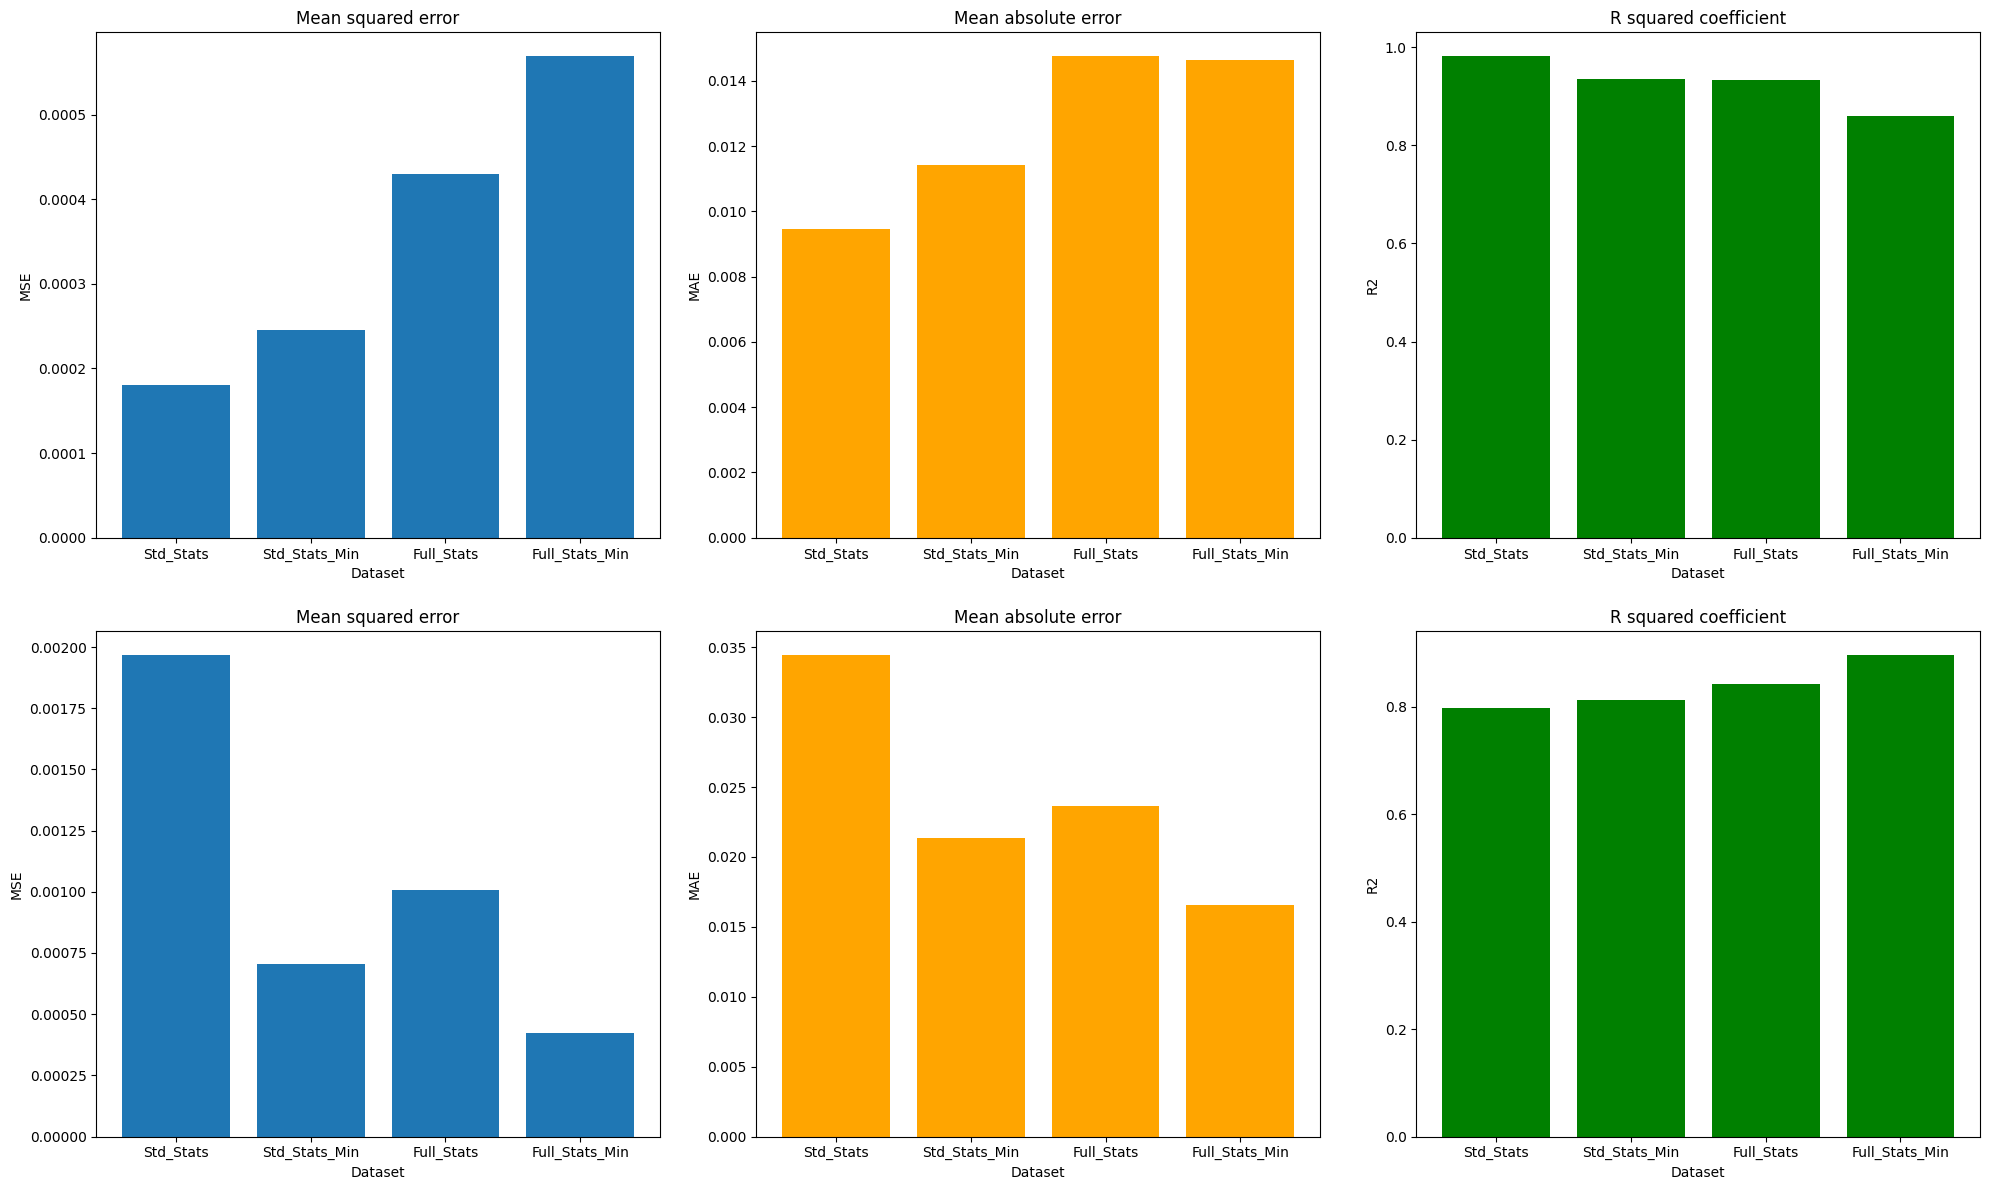

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20, 12))

# Plot each field
ax[0][0].bar(x=results_tree.iloc[:, 0], height=results_tree.iloc[:, 1])
ax[0][0].set_title('Mean squared error')
ax[0][0].set_ylabel('MSE')
ax[0][0].set_xlabel('Dataset')

ax[0][1].bar(x=results_tree.iloc[:, 0], height=results_tree.iloc[:, 2], color='orange')
ax[0][1].set_title('Mean absolute error')
ax[0][1].set_ylabel('MAE')
ax[0][1].set_xlabel('Dataset')

ax[0][2].bar(x=results_tree.iloc[:, 0], height=results_tree.iloc[:, 3], color='green')
ax[0][2].set_title('R squared coefficient')
ax[0][2].set_ylabel('R2')
ax[0][2].set_xlabel('Dataset')

ax[1][0].bar(x=results.iloc[:, 0], height=results.iloc[:, 1])
ax[1][0].set_title('Mean squared error')
ax[1][0].set_ylabel('MSE')
ax[1][0].set_xlabel('Dataset')

ax[1][1].bar(x=results.iloc[:, 0], height=results.iloc[:, 2], color='orange')
ax[1][1].set_title('Mean absolute error')
ax[1][1].set_ylabel('MAE')
ax[1][1].set_xlabel('Dataset')

ax[1][2].bar(x=results.iloc[:, 0], height=results.iloc[:, 3], color='green')
ax[1][2].set_title('R squared coefficient')
ax[1][2].set_ylabel('R2')
ax[1][2].set_xlabel('Dataset')

# Fix padding to prevent overlap
fig.tight_layout(w_pad=2, h_pad=2)
plt.show()

The random forest model (first row) performs best on the largest dataset we have, the standard set with only a 50 plate appearance minimum. The R suared coefficient in particular is much higher for the random forest.

After a few more seasons of collecting bat-tracking statistics, it would be interesting to rerun this test and see if the forest performs better on the data set with these metrics included.

## Conclusion

In conclusion, both the linear regressor and random forest regressor models performed well on our datasets. The linear regressor was much more difficult to set up due to the requirements needed, but we were able to identify key metrics that are good at predicting slugging percentage. Home runs and walk rate in particular are two key metrics that I would recommend teams and managers look at most when trying to choose players that will have high slugging percentage seasons.

The random forest model on the other hand was able to make better predictions for most of our datasets. However, this model is much more complicated, and its interpretability is questionable. For example, it's much more difficult to figure out with columns were most useful to themodel when making it's predictions. When we used the single decision tree, we did see home runs and walk rate making an impact, but by far the most impactful stat was wOBA. This is not helpful for managers trying to evaluate a player's upcoming season.

The best information I can give to general managers is to use a combination of walk rate and home runs when predicting slugging percentage. After more seasons of data are available with bat tracking metrics, hopefully we can see our model get more accurate, and begin to include some of these statistics in the most impactful. It would be very beneficial to use something such as a player's average swing speed or exit velocity to accurately predict slugging percentage.